# Two body scattering

In [7]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import math as m
from numpy.polynomial.legendre import leggauss
from scipy.special import legendre
from scipy.special import sph_harm
from scipy.interpolate import interp1d
from functions import * #Import the functions given in the lecture  
import matplotlib.pyplot as plt

In [8]:
data = np.genfromtxt('wf-obe-lam=800.00.dat', delimiter=';')


Lambda = 800
C0 = 2.470795e-02
hbarc = 197.327
E = -2.225/hbarc
mu =  938.92/hbarc
A = -0.1544435 
m_B = 138/hbarc
q = np.sqrt(-2*mu*E) ###Complex?
p = np.array(data[:,0])
p = np.append(p,q)
p_max = p[-2]
w = np.array(data[:,1])
w = np.append(w,0)

In [9]:
def delta(i,j):
    if i==j:
        return 1
    else:
        return 0

def V_matrix(i,j,q):
    return A/(2*np.pi)*1/((p[i]-p[j])**2+m_B**2)*np.exp(-((p[i]-p[j])**2+m_B**2)/Lambda**2)+C0/(4*np.pi)*np.exp(-(p[i]**2+p[j]**2)/Lambda**2)

def A_matrix(i,k,N,p_max,q):
    if k != N:
        return delta(i,k)-2*mu*V_matrix(i,k,q)*p[k]**2*w[k]/(q**2-p[k]**2)
    else:
        return delta(i,k)+np.sum(2*mu*V_matrix(i,N,q)*q**2*w[:-1]/(q**2-p[:-1]**2))-mu*q*V_matrix(i,N,q)*np.log((p_max+q)/(p_max-q))+i*np.pi*mu*q*V_matrix(i,N,q)
    


def gen_matrices(N,q):
    A_mat = []
    V_mat = []
    for i in range(N):
        A_mat.append([])
        V_mat.append([])
        for j in range(N):
            A_mat[i].append(A_matrix(i,j,N-1,p_max,q))
            V_mat[i].append(V_matrix(i,j,q))
    return A_mat, V_mat

def t_matrix(q):
    A_mat, V_mat = gen_matrices(len(p),q)
    return np.linalg.solve(A_mat, V_mat)

def S_matrix(q):
    return 1-2*1j*np.pi*mu*q*t_matrix(q)[-1][-1]

In [12]:
t_mat = t_matrix(q)
np.abs(S_matrix(1))

1.0004004982618317

In [13]:
S_matrix(1)

(1-0.028304715552733603j)

Text(0, 0.5, '$\\delta_l(q)$ / Degree')

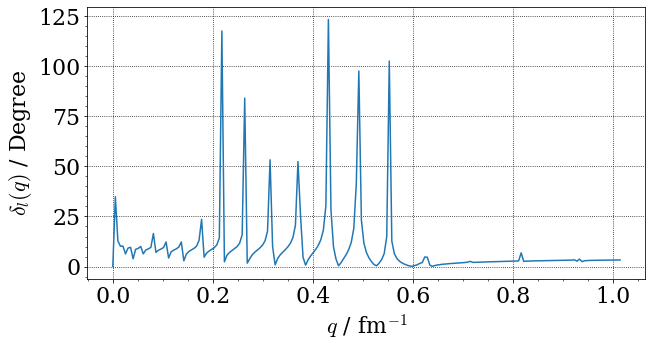

In [34]:
beauty_plot()
q_list = np.array([i for i in range(0,201)])/hbarc
phase_shift = []
for q in q_list:
    phase_shift.append(np.angle(S_matrix(q))/2)
plt.plot(q_list, np.abs(np.array(phase_shift)*2*360/np.pi))
plt.xlabel("$q$ / fm$^{-1}$")
plt.ylabel("$\delta_l(q)$ / Degree")